•	Nulová hypotéza HO: Neexistuje statisticky významný vztah mezi počtem narozených dětí a počtem dětí, které se budou hlásit na střední školu za 15 let od narození.
•	Alternativní hypotéza H1: Existuje statisticky významný vztah mezi počtem narozených dětí a počtem dětí, které se budou hlásit na střední školu za 15 let od narození.

In [7]:
# načtení potřebných modulů a zdrojové tabulky
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import shapiro

data = pd.read_csv("data_k_testu.csv", sep = ",")

In [8]:
# korelační matice, hodnota blízká 1 -> silná přímá lineární závislost
data_korelace = data[["SUM_NAROZENI", "SUM_KONALI"]]
print(data_korelace.corr())

              SUM_NAROZENI  SUM_KONALI
SUM_NAROZENI      1.000000    0.809596
SUM_KONALI        0.809596    1.000000


<Axes: xlabel='SUM_NAROZENI', ylabel='SUM_KONALI'>

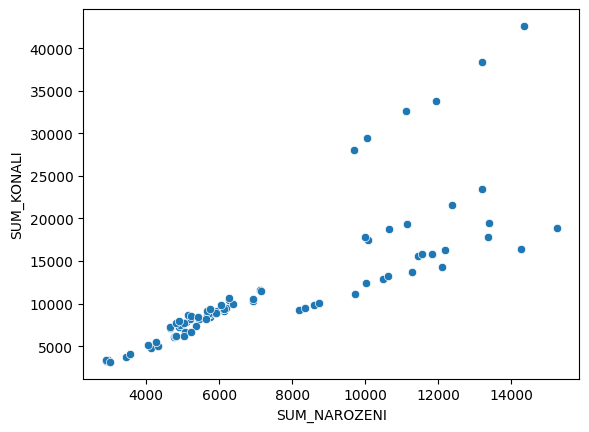

In [10]:
sns.scatterplot(data=data, x="SUM_NAROZENI", y="SUM_KONALI")

In [9]:
# Test statistické významnosti: Pearson test, p-value < 0.05 -> zamítáme HO, platí H1
result = stats.pearsonr(data["SUM_NAROZENI"], data["SUM_KONALI"])
result

PearsonRResult(statistic=0.8095959399783734, pvalue=1.1490359784270138e-20)

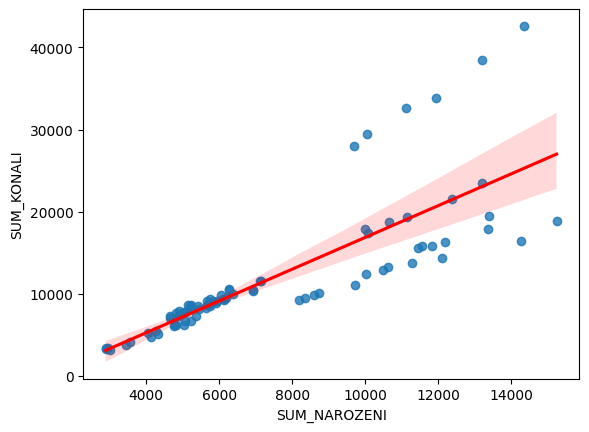

In [11]:
# Lineární regrese
# Závislá proměnná (osa y) = JPZ_KONALI, Nezávislá proměnná (osa x) = NAROZENI

g = sns.regplot(data, x="SUM_NAROZENI", y="SUM_KONALI", line_kws={"color" : "red"})

In [13]:
formula = "SUM_KONALI ~ SUM_NAROZENI"
mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SUM_KONALI   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     156.0
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.15e-20
Time:                        15:00:32   Log-Likelihood:                -826.13
No. Observations:                  84   AIC:                             1656.
Df Residuals:                      82   BIC:                             1661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2485.2125   1248.204     -1.991      0.050   -4968.287      -2.138
SUM_NAROZENI     1.9343      0.155     12.490      0.000       1.626       2.242
==============================================================================
Omnibus:                       45.213   Durbin-Watson:                   2.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.075
Skew:                           1.842   Prob(JB):                     9.37e-29
Kurtosis:                       7.827   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
data_subset = data[["KRAJ", "ROK", "SUM_NAROZENI", "SUM_KONALI"]]


# Lineární regrese pro každý kraj zvlášť
predictions = []


for kraj in data_subset["KRAJ"].unique():
    kraj_data = data_subset[data_subset["KRAJ"] == kraj]
   
    X = sm.add_constant(kraj_data[["SUM_NAROZENI"]])
    y = kraj_data["SUM_KONALI"]

    model = sm.OLS(y, X).fit()
        
    # Získání predikcí pro rok 2024 pro tento kraj
    prediction = model.predict([1, kraj_data["SUM_NAROZENI"].mean()])
    predictions.append({"KRAJ": kraj, "Prediction": prediction[0], "r":model.rsquared})


# Výpis predikcí pro rok 2024
data_2024 = pd.DataFrame(predictions)
print(data_2024)

data_2024.to_csv('Predikce_2024.csv', index=False)




               KRAJ    Prediction         r
0             Praha  34162.500000  0.990048
1       Středočeský  14926.833333  0.958400
2         Jihočeský   9573.500000  0.965958
3          Plzeňský   8325.000000  0.990975
4       Karlovarský   3511.666667  0.820491
5           Ústecký  10354.500000  0.950679
6         Liberecký   5553.666667  0.902487
7   Královéhradecký   8624.500000  0.937529
8        Pardubický   8034.166667  0.961180
9     Kraj Vysočina   6769.166667  0.985304
10     Jihomoravský  19732.666667  0.989790
11          Zlínský   9207.666667  0.956238
12  Moravskoslezský  16824.000000  0.877692
13        Olomoucký   9659.333333  0.920916
